In [1]:
#Importing required modules
from scipy.spatial.distance import euclidean
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from scipy.spatial import ConvexHull
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from operator import itemgetter
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

Import the dataset

In [2]:
pca_df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/data_pickle/all_sentences_pca.pkl')
#pca_df = pd.read_pickle('C:/Users/amaca253/Desktop/Friends-Friends-Language-Analysis/data_pickle/Episode_1_pca.pkl')

# To do a matrix : pca_df = pca_df.values attention select the pca row before

Plot PCA1 vs PCA2

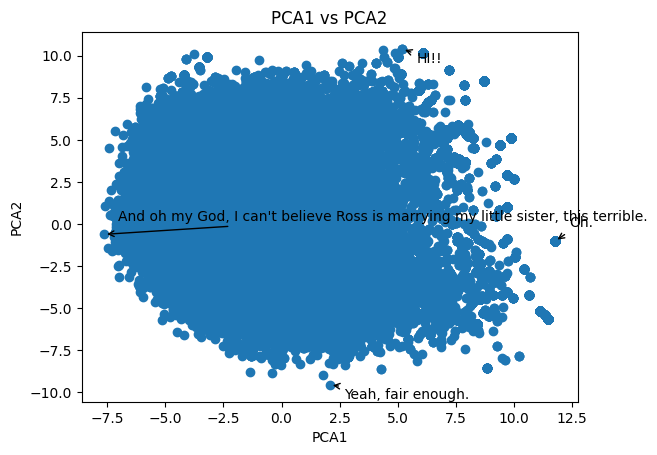

In [3]:
# Plotting PCA1 and PCA2

plt.scatter(pca_df['PCA1'], pca_df['PCA2'])

# Finding the index of the furthest words on each axis
max_pca1_index = pca_df['PCA1'].idxmax()
max_pca2_index = pca_df['PCA2'].idxmax()

min_pca1_index = pca_df['PCA1'].idxmin()
min_pca2_index = pca_df['PCA2'].idxmin()

# Getting the corresponding words
max_pca1_word = pca_df['Said'][max_pca1_index]
max_pca2_word = pca_df['Said'][max_pca2_index]

min_pca1_word = pca_df['Said'][min_pca1_index]
min_pca2_word = pca_df['Said'][min_pca2_index]

# Annotating the furthest words on each axis
plt.annotate(max_pca1_word, (pca_df['PCA1'][max_pca1_index], pca_df['PCA2'][max_pca1_index]), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(max_pca2_word, (pca_df['PCA1'][max_pca2_index], pca_df['PCA2'][max_pca2_index]), xytext=(10, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca1_word, (pca_df['PCA1'][min_pca1_index], pca_df['PCA2'][min_pca1_index]), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca2_word, (pca_df['PCA1'][min_pca2_index], pca_df['PCA2'][min_pca2_index]), xytext=(10, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))




# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA1 vs PCA2')

# Displaying the plot
plt.show()


Smallest et largest values from a PCA

In [4]:
x= pca_df.nsmallest(2000,'PCA20')
print('nSmaller')
print(x['Said'])
print()
x=pca_df.nlargest(2000,'PCA20')
print('nlargest')
print(x['Said'])

nSmaller
60099                           It's totally fine.
67272                         It's not bad at all.
40515    Except for Christmasand their birthdays.
32891                 Every thing's--they're fine.
62186               There's nothing wrong with it.
                           ...                    
81645                                          No.
81916                                          No.
81938                                          No.
82050                                          No.
82313                                          No.
Name: Said, Length: 2000, dtype: object

nlargest
14162                           Is he here?
14163                           Is he here?
32050                           Is he here?
77032                           Is he here?
72561    You don't think he's here, do you?
                        ...                
4749                         You know what?
7141                         You know what?
7388                        

Creation of 20 clusters

In [5]:
num_clusters = 20

X = pca_df.loc[:,'PCA1':'PCA20'] #select all the PCA

#Initialize the class object
kmeans = KMeans(
    n_clusters=num_clusters, 
    init='k-means++', 
    max_iter=100, 
    n_init=25)

#predict the labels of clusters.
label = kmeans.fit_predict(X)
# adding a cluster column to the dataset
pca_df['Cluster']= label

#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)


Here a create a list in order to get the closest point to each cluster center

In [6]:
from scipy.spatial.distance import euclidean

df2= X.values
# Loop over all clusters and find index of closest point to the cluster center and append to closest_pt_idx list.
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # get all points assigned to each cluster:
    cluster_pts = df2[kmeans.labels_ == iclust]
    # get all indices of points assigned to this cluster:
    cluster_pts_indices = np.where(kmeans.labels_ == iclust)[0]

    cluster_cen = kmeans.cluster_centers_[iclust]
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices])
    
    # Testing:    
    print('closest point to cluster center: ', cluster_pts[min_idx])
    print('closest index of point to cluster center: ', cluster_pts_indices[min_idx])
    print('  ', df2[cluster_pts_indices[min_idx]])
    closest_pt_idx.append(cluster_pts_indices[min_idx])
    print(pca_df['Person'][cluster_pts_indices[min_idx]],':',pca_df['Said'][cluster_pts_indices[min_idx]])


closest point to cluster center:  [ 4.0153613   2.5690825  -3.8964875  -5.161953   -1.9703729   3.3054872
 -2.6294563  -4.522714   -5.1177206   4.057721    0.46951854  2.1367202
  1.5655018  -2.0429285  -2.0395064   0.3282946   1.9126172  -0.8572195
  0.35871613 -2.7784402 ]
closest index of point to cluster center:  3218
   [ 4.0153613   2.5690825  -3.8964875  -5.161953   -1.9703729   3.3054872
 -2.6294563  -4.522714   -5.1177206   4.057721    0.46951854  2.1367202
  1.5655018  -2.0429285  -2.0395064   0.3282946   1.9126172  -0.8572195
  0.35871613 -2.7784402 ]
Rachel : No..!
closest point to cluster center:  [ 2.2960176  -0.72582954  3.6277623  -0.34892952 -1.5242517   1.632476
  2.1851456   3.2224064   1.2752262   0.85690683 -0.27523324  1.1849282
  0.7666739  -0.11097226 -1.798993   -0.06537375  2.4942107  -0.19787472
  2.2366178   1.9817128 ]
closest index of point to cluster center:  14972
   [ 2.2960176  -0.72582954  3.6277623  -0.34892952 -1.5242517   1.632476
  2.1851456   3.2

closest point to cluster center:  [ 7.4302      2.369811   -5.6564465   0.27478737  5.0689282   0.02073228
  1.0522393   2.6297166  -0.33596033  1.969987   -1.9054494   2.5123756
 -0.2667552   5.6144385  -2.266939   -0.31254056 -0.6736461   1.0292686
 -1.543418    1.0368509 ]
closest index of point to cluster center:  41730
   [ 7.4302      2.369811   -5.6564465   0.27478737  5.0689282   0.02073228
  1.0522393   2.6297166  -0.33596033  1.969987   -1.9054494   2.5123756
 -0.2667552   5.6144385  -2.266939   -0.31254056 -0.6736461   1.0292686
 -1.543418    1.0368509 ]
Rachel : Ohhh
closest point to cluster center:  [ 1.4972767   4.8689866  -4.986052   -4.4767256   5.3652864  -1.7114718
  4.4719815   4.4530797  -1.6755117   2.7986448  -1.05783     4.2422347
  2.8844886  -0.5284195  -4.9075046  -1.471595   -0.82705384 -0.54436576
  1.1371343  -0.18170613]
closest index of point to cluster center:  73237
   [ 1.4972767   4.8689866  -4.986052   -4.4767256   5.3652864  -1.7114718
  4.4719815  

Plot of all the clusters with their centers and the corresponding sentences.

[3218, 14972, 90926, 4625, 24830, 19, 46388, 54736, 35668, 76262, 57831, 14488, 74791, 39995, 41730, 73237, 66230, 60423, 46397, 15484]


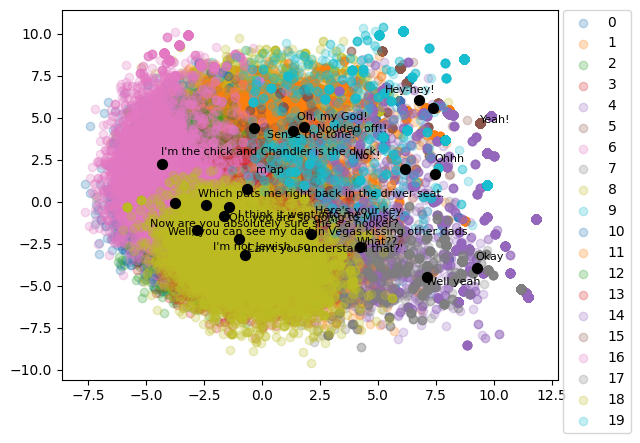

In [7]:
print(closest_pt_idx)
#plotting the results:
df2 = X.values
 
for i in u_labels:
    plt.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i, alpha= 0.25)

plt.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')
for i in closest_pt_idx:
    plt.annotate(pca_df['Said'][i], (df2[i,0], df2[i, 1]), fontsize=8)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

plt.show()

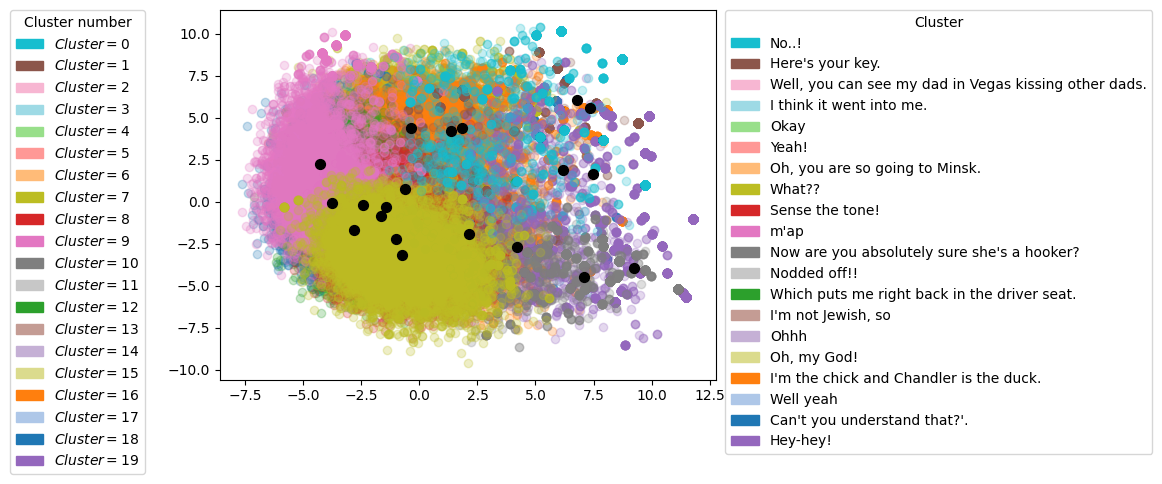

In [8]:
text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
colors = sns.color_palette('tab20', 20)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

df2 = X.values

fig = plt.figure()
ax = fig.add_subplot(111)

for i in u_labels:
    ax.scatter(df2[label == i , 0] , df2[label == i , 1] , label = i, alpha= 0.25)

ax.scatter(centroids[:,0] , centroids[:,1] , s = 50, color = 'k')


legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key],label=text[key]))
    
legend_list2 = []
for key in ind_col_map.keys():
    legend_list2.append(mpatches.Patch(color=ind_col_map[key],label=f'$Cluster = {key}$'))

first_legend=ax.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

ax.legend(title='Cluster number',bbox_to_anchor= (-0.15,1),handles=legend_list2, loc='upper right',borderaxespad=0)
ax.add_artist(first_legend)
plt.show()

Plot for each characters the percentage of each cluster. 
Side note: if the code run on 1 episode, characters can get is 0% belonging on some clusters

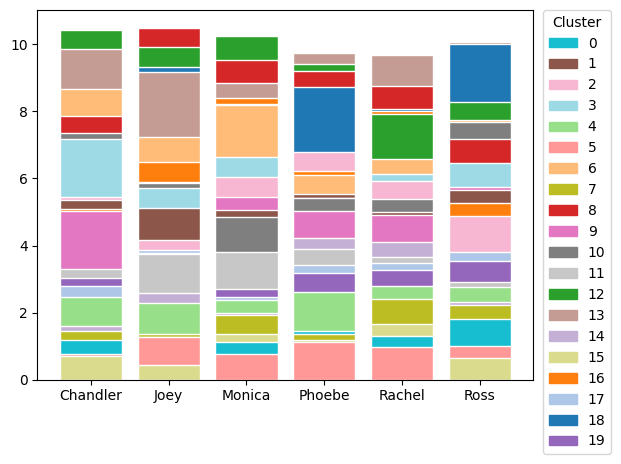

In [9]:


name=np.unique(pca_df['Person'])
r= np.arange(len(name))

colors = sns.color_palette('tab20', 20)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

for i in name:
    character =pca_df[pca_df['Person'].str.contains(i)]
    percentage = character['Cluster'].value_counts(normalize=True) * 100 # decreasing order
    x = np.zeros(num_clusters)
    for cluster_val in percentage.index:
        x[cluster_val]=percentage[cluster_val]
        plt.bar(i,x[cluster_val], edgecolor='white', color=ind_col_map[cluster_val], label=f'$Cluster = {cluster_val}$')
        

legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key], label=key))

    # display the graph.
plt.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

plt.show()



100.0
100.0
99.99999999999999
100.00000000000001
99.99999999999999
100.00000000000001


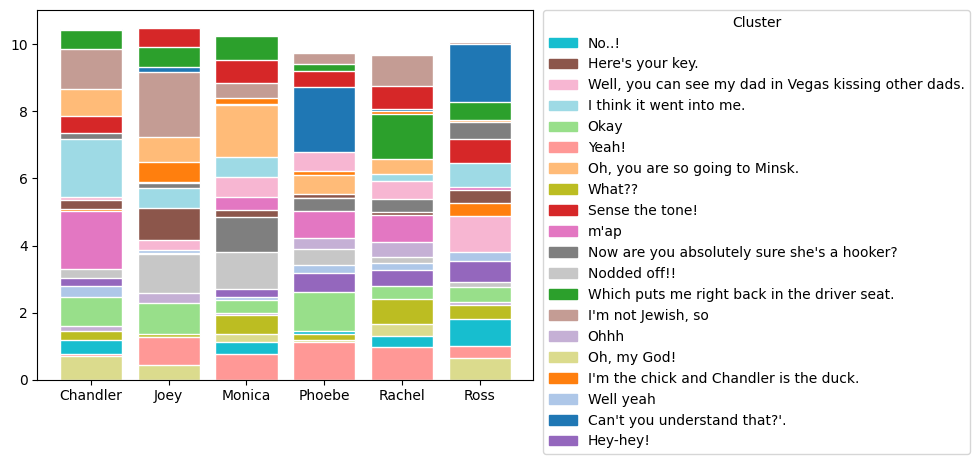

In [12]:
import matplotlib.patches as mpatches
text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]

name=np.unique(pca_df['Person'])
r= np.arange(len(name))

colors = sns.color_palette('tab20', 20)
ind_col_map = {x:y for x, y in zip(pca_df['Cluster'].unique(),
                               colors)}
ind_col_map = dict(sorted(ind_col_map.items()))

for i in name:
    character =pca_df[pca_df['Person'].str.contains(i)]
    percentage = character['Cluster'].value_counts(normalize=True) * 100 # decreasing order
    print(percentage.sum())
    x = np.zeros(num_clusters)
    for cluster_val in percentage.index:
        x[cluster_val]=percentage[cluster_val]
        plt.bar(i,x[cluster_val], edgecolor='white', color=ind_col_map[cluster_val], label=f'$Cluster = {cluster_val}$')
        

legend_list = []
for key in ind_col_map.keys():
    legend_list.append(mpatches.Patch(color=ind_col_map[key], label=text[key]))

plt.legend(title='Cluster',bbox_to_anchor=(1.02, 1),handles=legend_list, loc='upper left', borderaxespad=0)

plt.show()




## Hull

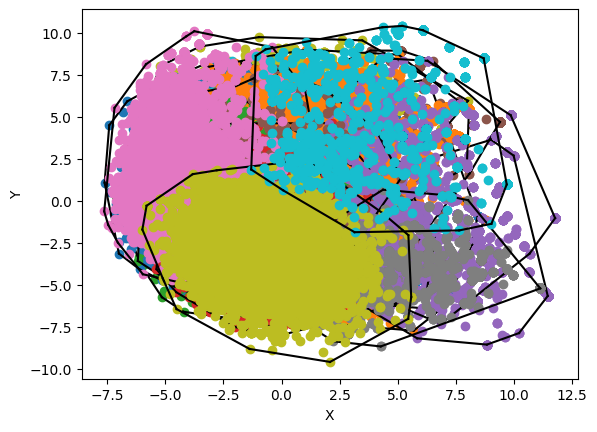

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull

data = X.values

# Assume you have already clustered your data and have labels for each point
labels = label
# Create a figure and axis for plotting
fig, ax = plt.subplots()

# Iterate over unique labels to plot convex hulls for each cluster
for i in u_labels:
    # Get the points belonging to the current cluster
    #cluster_points = data[labels == label]
    cluster_points = pca_df.loc[pca_df['Cluster'] == i,['PCA1','PCA2']]
    cluster_points =  cluster_points.values

    # Compute the convex hull for the current cluster
    hull = ConvexHull(cluster_points)

    # Plot the convex hull
    ax.plot(cluster_points[:, 0], cluster_points[:, 1], 'o')
    for simplex in hull.simplices:
        ax.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], 'k-')

# Set labels and show the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()


Now we want to do the hull with the 50% first points of each cluster

In [33]:
from operator import itemgetter
data = X.values
distances = kmeans.transform(X) #return a matrix of distance of each point to each cluster center

# Create a figure and axis for plotting
#fig, ax = plt.subplots()

# Iterating for each cluster
for i in u_labels:
    # We get all the point that belong to the specific cluster that we work on
    cluster_points = pca_df.loc[pca_df['Cluster'] == i]
    
    # Creation of list with the index of the point and the corresponding distance to the center of the cluster
    distance_list=[]
    for j in cluster_points.index:
        distance_temporaire = distances[j,i]
        temp = [j,distance_temporaire]
        distance_list.append(temp)
        
    # Then we sort the list by decreasing order of the distance to the cluster center.     
    sort_list = sorted(distance_list, key=itemgetter(1))
    
    # We want only 50 percents of point of that list:
    num50 = int(len(cluster_points[0:])/2)
    final_list=sort_list[:num50]

    # Get the actual data points using the indices
    closest_points_index = [l[0] for l in final_list]
    #closest_points = [pca_df.loc[c] for c in closest_points_index]
    closest_points = [pca_df.loc[c][0:2] for c in closest_points_index]
    
    points=np.zeros((len(closest_points),2))
    for i in np.arange(len(closest_points)):
        points[i][0]= closest_points[i][0]
        points[i][1]=closest_points[i][1]

    # Compute the convex hull for the current cluster

    hull = ConvexHull(points)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

for ax in (ax1, ax2):
    ax.plot(points[:, 0], points[:, 1], '.', color='k')
    if ax == ax1:
        ax.set_title('Given points')
    else:
        ax.set_title('Convex hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='r', color='none', lw=1, markersize=10)

    # Plot the convex hull
    #ax.plot(cluster_points[:, 0], cluster_points[:, 1], 'o')
    #for simplex in hull.simplices:
    #    ax.plot(cluster_points[simplex, 0], cluster_points[simplex, 1], 'k-')


# Set labels and show the plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.show()




QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1098140890  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width 0.98  Error-roundoff 4.3e-15  _one-merge 2.2e-14
  _near-inside 1.1e-13  Visible-distance 8.6e-15  U-max-coplanar 8.6e-15
  Width-outside 1.7e-14  _wide-facet 5.2e-14  _maxoutside 2.6e-14

The input to qhull appears to be less than 2 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p2(v3):     5  -3.4
- p1(v2):     5  -3.4
- p0(v1):   4.1  -2.6

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 4.3e-15.  The center point, facets and distances
to the center point are as follows:

center point    4.717   -3.091

facet p1 p0 distance= -4.4e-16
facet p2 p0 distance= 4.4e-16
facet p2 p1 distance= -0.045

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:     4.062     5.045  difference= 0.9828
  1:    -3.356  -2.225e-308  difference= 3.356

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 4.3e-15.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


In [43]:
data = X.values
distances = kmeans.transform(X)

for i in u_labels:
    cluster_points = pca_df.loc[pca_df['Cluster'] == i]
    
    distance_list=[]
    for j in cluster_points.index:
        distance_temporaire = distances[j,i]
        temp = [j,distance_temporaire]
        distance_list.append(temp)
        sort_list = sorted(distance_list, key=itemgetter(1))
        num50 = int(len(cluster_points[0:])/2)
        final_list=sort_list[:num50]
    

    closest_points_index = [l[0] for l in final_list]
    closest_points = [pca_df.loc[c][0:2] for c in closest_points_index]
    test=np.zeros((len(closest_points),2))

    for i in np.arange(len(closest_points)):
        test[i][0]= closest_points[i][0]
        test[i][1]=closest_points[i][1]

    points = test#np.random.randint(0, 10, size=(15, 2))  # Random points in 2-D
    hull = ConvexHull(points)
    #plot all point
    rest_list=sort_list[num50:]
    rest_point_index=[l[0] for l in rest_list]
    rest_points = [pca_df.loc[c][0:2] for c in rest_point_index]
    rest=np.zeros((len(rest_points),2))
    for i in np.arange(len(rest_points)):
        rest[i][0]= rest_points[i][0]
        rest[i][1]=rest_points[i][1]


    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

    for ax in (ax1, ax2):
        ax.plot(points[:, 0], points[:, 1], '.', color='midnightblue')
        ax.scatter(rest[:, 0], rest[:, 1],c='royalblue', alpha=0.25)
        if ax == ax1:
            ax.set_title('Given points')
        else:
            ax.set_title('Convex hull')
            for simplex in hull.simplices:
                ax.plot(points[simplex, 0], points[simplex, 1], 'c')
            ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='b', color='none', lw=1, markersize=10)

plt.show()

QhullError: QH6154 Qhull precision error: Initial simplex is flat (facet 1 is coplanar with the interior point)

While executing:  | qhull i Qt
Options selected for Qhull 2019.1.r 2019/06/21:
  run-id 1105569584  incidence  Qtriangulate  _pre-merge  _zero-centrum
  _max-width 0.98  Error-roundoff 4.3e-15  _one-merge 2.2e-14
  _near-inside 1.1e-13  Visible-distance 8.6e-15  U-max-coplanar 8.6e-15
  Width-outside 1.7e-14  _wide-facet 5.2e-14  _maxoutside 2.6e-14

The input to qhull appears to be less than 2 dimensional, or a
computation has overflowed.

Qhull could not construct a clearly convex simplex from points:
- p2(v3):     5  -3.4
- p1(v2):     5  -3.4
- p0(v1):   4.1  -2.6

The center point is coplanar with a facet, or a vertex is coplanar
with a neighboring facet.  The maximum round off error for
computing distances is 4.3e-15.  The center point, facets and distances
to the center point are as follows:

center point    4.717   -3.091

facet p1 p0 distance= -4.4e-16
facet p2 p0 distance= 4.4e-16
facet p2 p1 distance= -0.045

These points either have a maximum or minimum x-coordinate, or
they maximize the determinant for k coordinates.  Trial points
are first selected from points that maximize a coordinate.

The min and max coordinates for each dimension are:
  0:     4.062     5.045  difference= 0.9828
  1:    -3.356  -2.225e-308  difference= 3.356

If the input should be full dimensional, you have several options that
may determine an initial simplex:
  - use 'QJ'  to joggle the input and make it full dimensional
  - use 'QbB' to scale the points to the unit cube
  - use 'QR0' to randomly rotate the input for different maximum points
  - use 'Qs'  to search all points for the initial simplex
  - use 'En'  to specify a maximum roundoff error less than 4.3e-15.
  - trace execution with 'T3' to see the determinant for each point.

If the input is lower dimensional:
  - use 'QJ' to joggle the input and make it full dimensional
  - use 'Qbk:0Bk:0' to delete coordinate k from the input.  You should
    pick the coordinate with the least range.  The hull will have the
    correct topology.
  - determine the flat containing the points, rotate the points
    into a coordinate plane, and delete the other coordinates.
  - add one or more points to make the input full dimensional.


Test over cluster 1

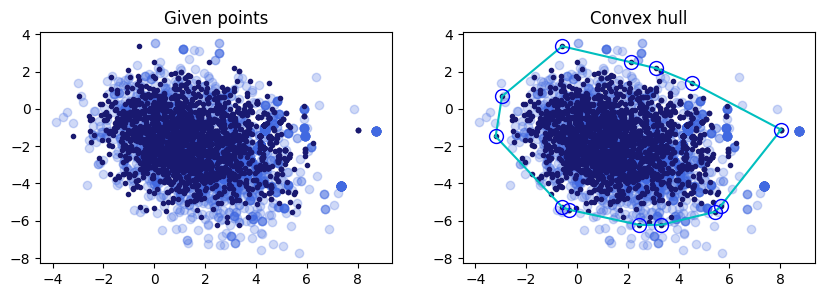

In [41]:
data = X.values
distances = kmeans.transform(X)
i=1
cluster_points = pca_df.loc[pca_df['Cluster'] == i]
    
distance_list=[]
for j in cluster_points.index:
    distance_temporaire = distances[j,i]
    temp = [j,distance_temporaire]
    distance_list.append(temp)
    sort_list = sorted(distance_list, key=itemgetter(1))
    num50 = int(len(cluster_points[0:])/2)
    final_list=sort_list[:num50]
    

closest_points_index = [l[0] for l in final_list]
closest_points = [pca_df.loc[c][0:2] for c in closest_points_index]
test=np.zeros((len(closest_points),2))

for i in np.arange(len(closest_points)):
    test[i][0]= closest_points[i][0]
    test[i][1]=closest_points[i][1]

points = test#np.random.randint(0, 10, size=(15, 2))  # Random points in 2-D
hull = ConvexHull(points)
#plot all point
rest_list=sort_list[num50:]
rest_point_index=[l[0] for l in rest_list]
rest_points = [pca_df.loc[c][0:2] for c in rest_point_index]
rest=np.zeros((len(rest_points),2))
for i in np.arange(len(rest_points)):
    rest[i][0]= rest_points[i][0]
    rest[i][1]=rest_points[i][1]


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

for ax in (ax1, ax2):
    ax.plot(points[:, 0], points[:, 1], '.', color='midnightblue')
    ax.scatter(rest[:, 0], rest[:, 1],c='royalblue', alpha=0.25)
    if ax == ax1:
        ax.set_title('Given points')
    else:
        ax.set_title('Convex hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='b', color='none', lw=1, markersize=10)

plt.show()

Test over cluster 0

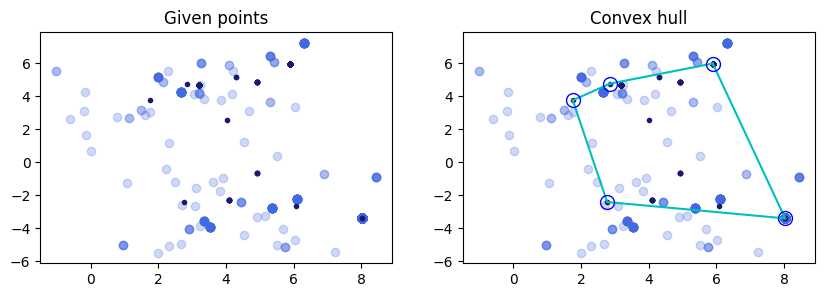

In [38]:
data = X.values
distances = kmeans.transform(X)
i=0
cluster_points = pca_df.loc[pca_df['Cluster'] == i]
    
distance_list=[]
for j in cluster_points.index:
    distance_temporaire = distances[j,i]
    temp = [j,distance_temporaire]
    distance_list.append(temp)
    sort_list = sorted(distance_list, key=itemgetter(1))
    num50 = int(len(cluster_points[0:])/2)
    final_list=sort_list[:num50]
    

closest_points_index = [l[0] for l in final_list]
closest_points = [pca_df.loc[c][0:2] for c in closest_points_index]
test=np.zeros((len(closest_points),2))

for i in np.arange(len(closest_points)):
    test[i][0]= closest_points[i][0]
    test[i][1]=closest_points[i][1]

points = test#np.random.randint(0, 10, size=(15, 2))  # Random points in 2-D
hull = ConvexHull(points)
#plot all point
rest_list=sort_list[num50:]
rest_point_index=[l[0] for l in rest_list]
rest_points = [pca_df.loc[c][0:2] for c in rest_point_index]
rest=np.zeros((len(rest_points),2))
for i in np.arange(len(rest_points)):
    rest[i][0]= rest_points[i][0]
    rest[i][1]=rest_points[i][1]


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 3))

for ax in (ax1, ax2):
    ax.plot(points[:, 0], points[:, 1], '.', color='midnightblue')
    ax.scatter(rest[:, 0], rest[:, 1],c='royalblue', alpha=0.25)
    if ax == ax1:
        ax.set_title('Given points')
    else:
        ax.set_title('Convex hull')
        for simplex in hull.simplices:
            ax.plot(points[simplex, 0], points[simplex, 1], 'c')
        ax.plot(points[hull.vertices, 0], points[hull.vertices, 1], 'o', mec='b', color='none', lw=1, markersize=10)

plt.show()

## Standard deviation (in progress for the plot)

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

X = pca_df.loc[:,'PCA1':'PCA20']  #select all the PCA

# Number of clusters
num_clusters = 20

# Number of iterations
num_iterations = 10

# List to store standard deviation values for each cluster
cluster_std_deviations = []

# Run clustering process 100 times
for _ in range(num_iterations):
    
   #Initialize the class object
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=100, n_init=25)

    #predict the labels of clusters.
    label = kmeans.fit_predict(X)
    
    # Get cluster labels and cluster centers
    cluster_labels = kmeans.labels_
    cluster_centers = kmeans.cluster_centers_
    
    # Calculate standard deviation for each cluster
    std_deviations = []
    for i in range(num_clusters):
        cluster_points = pca_df.loc[pca_df['Cluster'] == i,['PCA1','PCA2']]
        cluster_points = cluster_points.values
        std_deviation = np.std(cluster_points, axis=0)
        std_deviations.append(std_deviation)
    
    # Append the standard deviation values to the list
    cluster_std_deviations.append(std_deviations)

# Print standard deviation values for each cluster
for i, std_deviations in enumerate(cluster_std_deviations):
        print(f"Cluster {i+1}: {std_deviations}")


# Study of Ross

Here we are looking for the average phrase in the cluster.
Since we already have the clusters, we will extract the data of "Ross", and do the average of the cluster depending on 'Ross' only.

In [ ]:
closest_pt_idx = []
for iclust in range(kmeans.n_clusters):
    # we collect all the data from the dataset of a precise cluster
    cluster_pts = pca_df[kmeans.labels_ == iclust] 
    # we extract only ross
    cluster_pts =  cluster_pts[cluster_pts['Person'].str.contains('Ross')] 
    # we get the index
    cluster_pts_indices = cluster_pts.index 
    # Center of the cluster
    cluster_cen = kmeans.cluster_centers_[iclust] 
    # Closest sentence from the center of the cluster
    min_idx = np.argmin([euclidean(df2[idx], cluster_cen) for idx in cluster_pts_indices]) 

    # Testing:    
    #print('closest point to cluster center: ', cluster_pts.iloc[min_idx])
    print('closest index of point to cluster center: ', cluster_pts_indices[min_idx])
    #print('  ', pca_df.iloc[cluster_pts_indices[min_idx]])
    closest_pt_idx.append(cluster_pts_indices[min_idx])
    print(pca_df['Person'][cluster_pts_indices[min_idx]],':',pca_df['Said'][cluster_pts_indices[min_idx]])

In [ ]:
character =pca_df[pca_df['Person'].str.contains('Ross')]
percentage = character['Cluster'].value_counts(normalize=True) * 100
df3 = percentage.to_frame(name="Percentage")
value = [df3.loc[i].values for i in df3.index]


In [ ]:
# Preparation for the plot
text = [pca_df['Said'][closest_pt_idx[i]] for i in range(num_clusters)]
value = [df3.loc[i].values for i in range(num_clusters)]
lists= df3.index.values.tolist()

# Plot
colors = sns.color_palette('tab20', 20)
# Initialize layout
for i in range(num_clusters):
    plt.bar(i, df3.loc[i].values,label=text[i], color=colors[i]) # Here is loc and not iloc!!!!


plt.legend(title='Cluster medium sentences',bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.xticks(np.arange(20))
plt.xlabel("Cluster number")
plt.ylabel("Percentage")
plt.title("Ross cluster percentage and his average sentence")

plt.show()

In [ ]:
cluster_points = ross.loc[ross['Cluster'] == 0,['PCA1','PCA2']]
    
max_pca1_index = cluster_points['PCA1'].idxmax()
max_pca2_index = cluster_points['PCA2'].idxmax()
min_pca1_index = cluster_points['PCA1'].idxmin()
min_pca2_index = cluster_points['PCA2'].idxmin()

# Getting the corresponding words
max_pca1_word = ross['Said'][max_pca1_index]
max_pca2_word = ross['Said'][max_pca2_index]
min_pca1_word = ross['Said'][min_pca1_index]
min_pca2_word = ross['Said'][min_pca2_index]


In [ ]:
plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'])

# Annotating the furthest words on each axis
plt.annotate(max_pca1_word, (cluster_points['PCA1'][max_pca1_index], cluster_points['PCA2'][max_pca1_index]), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(max_pca2_word, (cluster_points['PCA1'][max_pca2_index], cluster_points['PCA2'][max_pca2_index]), xytext=(10, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca1_word, (cluster_points['PCA1'][min_pca1_index], cluster_points['PCA2'][min_pca1_index]), xytext=(10, 10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))
plt.annotate(min_pca2_word, (cluster_points['PCA1'][min_pca2_index], cluster_points['PCA2'][min_pca2_index]), xytext=(10, -10),
             textcoords='offset points', arrowprops=dict(arrowstyle="->"))


clust =  cluster_points.values
hull = ConvexHull(clust)
ax.plot(clust[:, 0], clust[:, 1], 'o')
for simplex in hull.simplices:
    ax.plot(clust[simplex, 0], clust[simplex, 1], 'k-')

# Adding labels and title
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Cluster 0: PCA1 vs PCA2')

# Displaying the plot
plt.show()